In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv(next(iter(uploaded)))


Saving auto-mpg.csv to auto-mpg.csv


In [4]:
# Display basic dataset info
print("Dataset Shape:", df.shape)
print("Number of Columns:", len(df.columns))
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Check for null values
print("\nNull Values:")
print(df.isnull().sum())

# Find unique values
print("\nUnique Values:")
print(df.nunique())

Dataset Shape: (398, 9)
Number of Columns: 9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None

Summary Statistics:
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.84

In [5]:
# Convert column names to remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Drop any non-numeric columns for analysis
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]


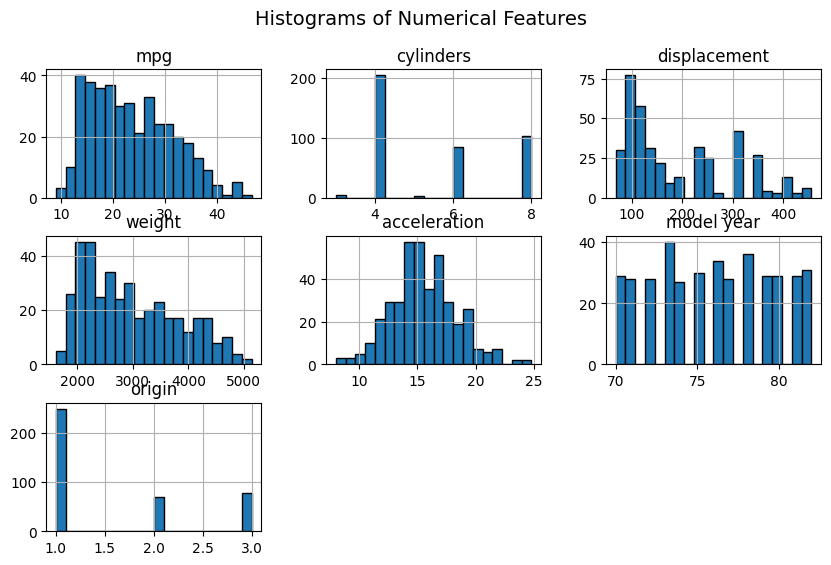

In [6]:
# Plot histograms
df_numeric.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()


<ipython-input-8-d14710fcb731>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], palette="viridis")
<ipython-input-8-d14710fcb731>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=numeric_cols[-2], y=numeric_cols[-1], palette="coolwarm")


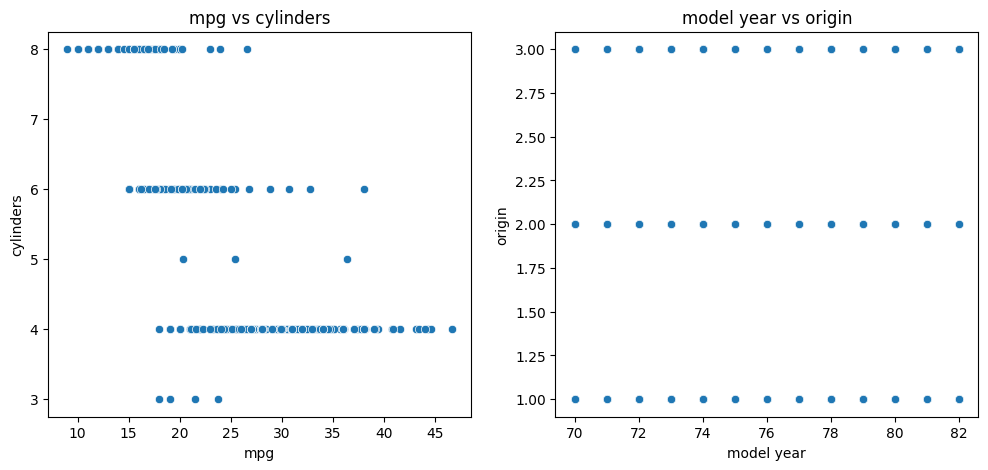

In [8]:
# Scatterplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], palette="viridis")
plt.title(f"{numeric_cols[0]} vs {numeric_cols[1]}")
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x=numeric_cols[-2], y=numeric_cols[-1], palette="coolwarm")
plt.title(f"{numeric_cols[-2]} vs {numeric_cols[-1]}")
plt.show()

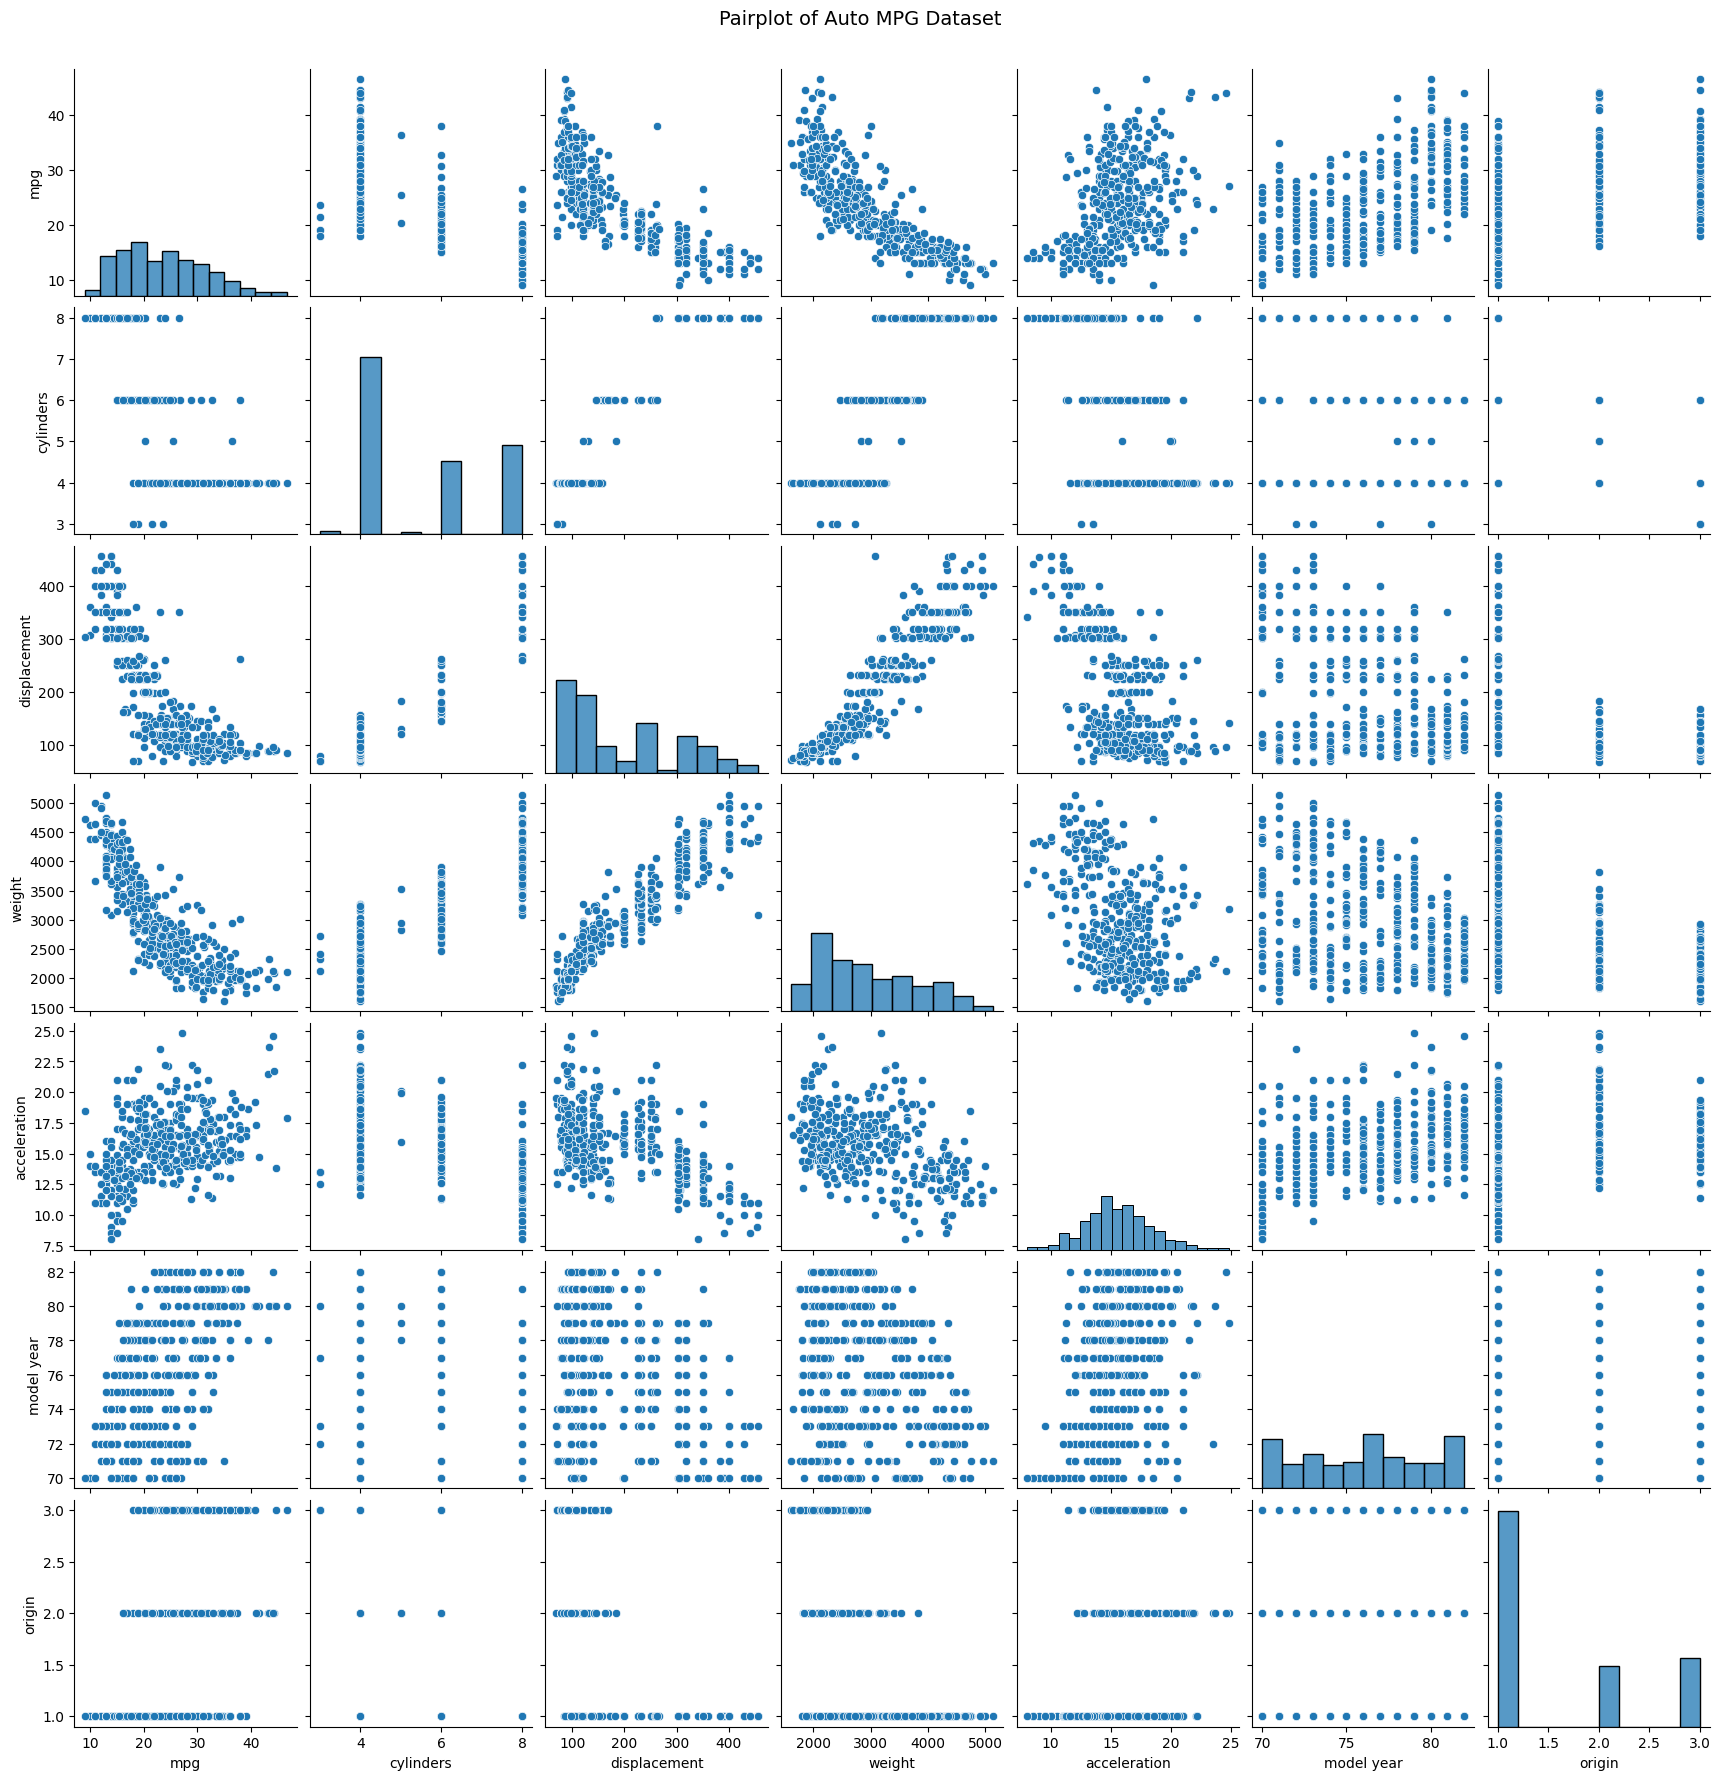

In [9]:
# Pairplot
sns.pairplot(df_numeric)
plt.suptitle("Pairplot of Auto MPG Dataset", fontsize=14, y=1.02)
plt.show()

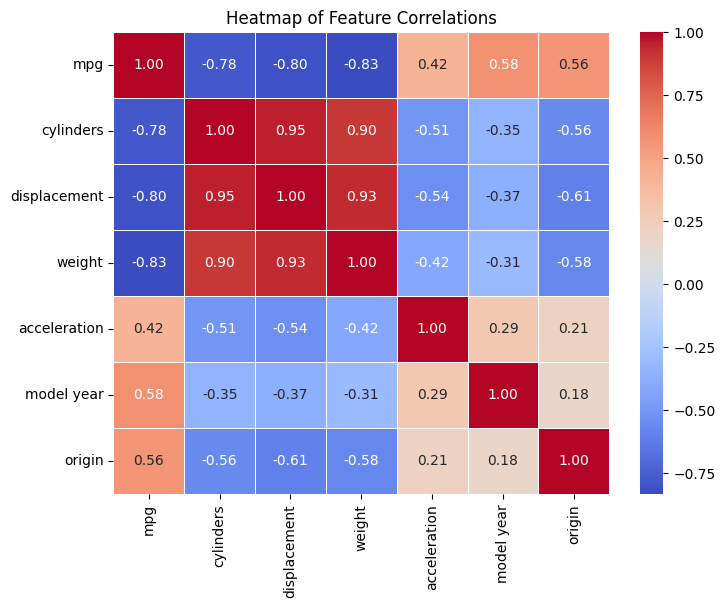

In [10]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

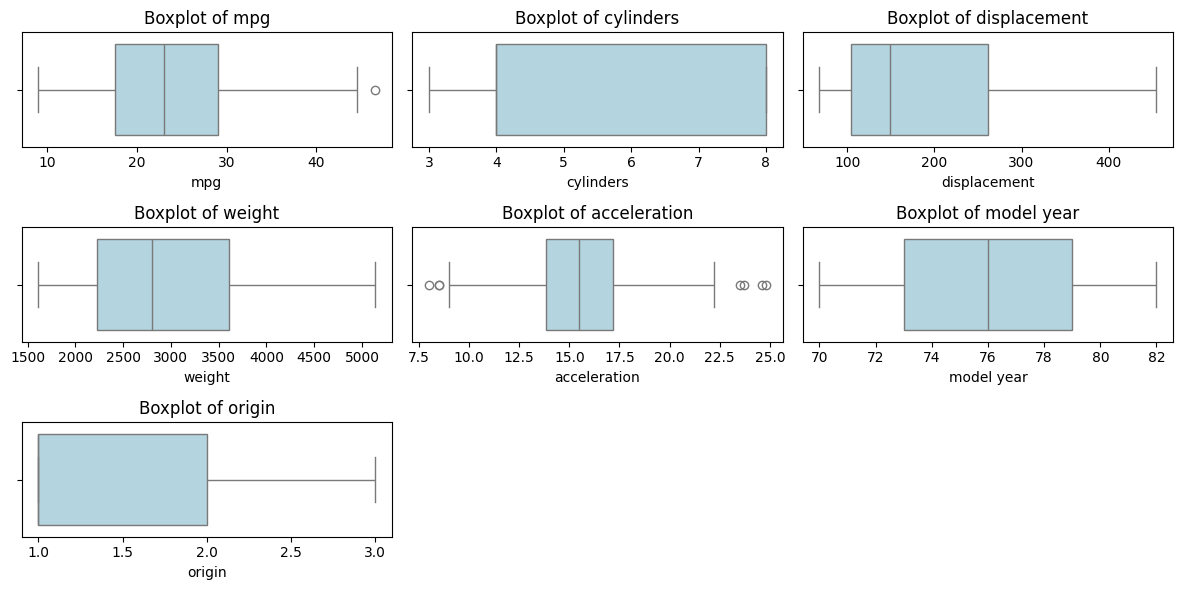

In [13]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(3, 3, i)  # Changed to 3 rows, 3 columns
    sns.boxplot(x=df_numeric[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [15]:
# Handling Outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# Apply outlier removal
df_cleaned = df_numeric.copy()
for col in df_numeric.columns:
    df_cleaned = remove_outliers(df_cleaned, col)

# Display shape before and after outlier removal
print("\nOriginal Shape:", df.shape)
print("Cleaned Shape:", df_cleaned.shape)



Original Shape: (398, 9)
Cleaned Shape: (387, 7)
